author:leezeeyee   
date:2021/5/12

In [1]:
import numpy as np
from utils import timer
import matplotlib.pyplot as plt

## Gram-Schmidt process

In [2]:
def proj(U,V):
    '''
    computer the projection of vector $V$ on the direction of $U$ 
    U and V should be same dimension
    '''
    if U.shape != V.shape:
        raise Exception('not in same dimension')
    return np.dot(U,V)*U/np.dot(U,U)

In [3]:
proj(np.array([3,4]),np.array([3,2]))

array([2.04, 2.72])

In [4]:
@timer
def gram_schmidt_c(A):
    U=np.copy(A)
    for col in range(A.shape[1]):
        for i in range(col):
            # now the u is already normalized
            U[:,col]-=np.dot(U[:,i],A[:,col])*U[:,i]#proj(U[:,i],A[:,col]) 
        U[:,col]/=np.sqrt(np.dot(U[:,col],U[:,col]))
    return U
            


In [5]:
@timer
def gram_schmidt_r(A):
    A=A.transpose()
    U=np.copy(A)
    for col in range(A.shape[0]):
        for i in range(col):
            # now the u is already normalized
            U[col]-=np.dot(U[i],A[col])*U[i]#proj(U[:,i],A[:,col]) 
        U[col]/=np.sqrt(np.dot(U[col],U[col]))
    return U.transpose()

In [6]:
@timer
def gram_schmidt_o(A):
    if A.shape[0]>A.shape[1]:
        return gram_schmidt_c.__wrapped__(A)
    else:
        return gram_schmidt_r.__wrapped__(A)

In [8]:
A=np.random.rand(5,3)
res=gram_schmidt_o.__wrapped__(A)
print(res)
res=gram_schmidt_c.__wrapped__(A)
print(res)

[[ 0.55083242 -0.04953334 -0.40186816]
 [ 0.60346421  0.07205507  0.68184601]
 [ 0.08249501  0.96371241 -0.21882365]
 [ 0.52878907 -0.22621343 -0.46152577]
 [ 0.21445579  0.11153646  0.3357055 ]]
[[ 0.55083242 -0.04953334 -0.40186816]
 [ 0.60346421  0.07205507  0.68184601]
 [ 0.08249501  0.96371241 -0.21882365]
 [ 0.52878907 -0.22621343 -0.46152577]
 [ 0.21445579  0.11153646  0.3357055 ]]


In [9]:
res

array([[ 0.55083242, -0.04953334, -0.40186816],
       [ 0.60346421,  0.07205507,  0.68184601],
       [ 0.08249501,  0.96371241, -0.21882365],
       [ 0.52878907, -0.22621343, -0.46152577],
       [ 0.21445579,  0.11153646,  0.3357055 ]])

In [10]:
gram_schmidt_o.__wrapped__(np.random.rand(5,3))

array([[ 0.3880756 ,  0.4505146 , -0.45417142],
       [ 0.63846315,  0.16942951,  0.61200789],
       [ 0.46799023,  0.24423928, -0.26207587],
       [ 0.13199585, -0.23353241,  0.48239018],
       [ 0.45312734, -0.80878923, -0.34320638]])

In [11]:
for col in range(res.shape[1]):
    print(np.dot(res[:,col],res[:,2]))

0.0
2.220446049250313e-16
1.0


## QR decomposition

In [12]:
@timer
def gram_schmidt_jjgo(vectors):
    basis = []
    for v in vectors:
        w = v - sum (np.dot(v,b)*b  for b in basis )
        #( np.fromiter( (np.dot(v,b)*b  for b in basis ),float ))
        if (w > 1e-10).any():  
            basis.append(w/np.linalg.norm(w))
    return np.array(basis)

In [14]:
test = np.random.rand(98,59)

res,time=(gram_schmidt_c(test))
print(time)
res,time=(gram_schmidt_o(test))
print(time)
res,time=(gram_schmidt_jjgo(test))
print(time)

0:00:00.036232
0:00:00.026927
0:00:00.031948


In [57]:
mode=1
#(0:matrix 1:fixed row 2:fixed col)
fixed_size=50
label_dict={0:'matrix', 1:'fixed row', 2:'fixed col'}

In [58]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,400,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    if mode is 0:
        A=np.random.rand(d,d)
    elif mode is 1:
        A=np.random.rand(fixed_size,d)
    elif mode is 2:
        A=np.random.rand(d,fixed_size)
    # for i in range(3):
    res,t1=(gram_schmidt_c(A))
    res,t2=(gram_schmidt_r(A))
    res,t3=(gram_schmidt_jjgo(A))
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

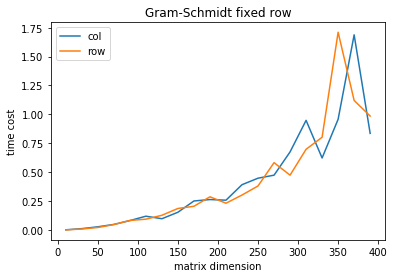

In [59]:
plt.plot(ranges,t1s,label='col')
plt.plot(ranges,t2s,label='row')
# plt.plot(ranges,t3s,label='others')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('Gram-Schmidt '+label_dict[mode])
plt.show()

In [18]:
mode=0
#(0:matrix 1:fixed row 2:fixed col)
fixed_size=50
label_dict={0:'matrix', 1:'fixed row', 2:'fixed col'}

In [19]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,500,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    if mode is 0:
        A=np.random.rand(d,d)
    elif mode is 1:
        A=np.random.rand(fixed_size,d)
    elif mode is 2:
        A=np.random.rand(d,fixed_size)
    # for i in range(3):
    res,t1=(gram_schmidt_c(A))
    res,t2=(gram_schmidt_r(A))
    res,t3=(gram_schmidt_o(A))
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

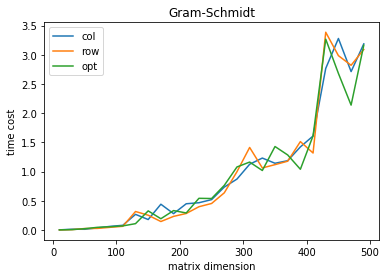

In [20]:
plt.plot(ranges,t1s,label='col')
plt.plot(ranges,t2s,label='row')
plt.plot(ranges,t3s,label='opt')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('Gram-Schmidt')
plt.show()

In [21]:

test = np.random.rand(3,4)
# test = np.array([[3.0, 1.0], [2.0, 2.0]])
# print(np.array(gs(test)))
print(gram_schmidt_c.__wrapped__(test))
print(gram_schmidt_o.__wrapped__(test))
# print(gram_schmidt_jjgo.__wrapped__(test.transpose()).transpose())

[[ 0.52885726  0.50510335  0.6820415  -0.62250302]
 [ 0.78847803 -0.58975032 -0.17463375  0.76398098]
 [ 0.3140261   0.63013106 -0.71015664  0.16977355]]
[[ 0.52885726  0.50510335  0.6820415  -0.62250302]
 [ 0.78847803 -0.58975032 -0.17463375  0.76398098]
 [ 0.3140261   0.63013106 -0.71015664  0.16977355]]


In [22]:
A=np.random.rand(3,3)
Q=gram_schmidt_o.__wrapped__(A)
R=np.zeros([A.shape[1],A.shape[1]])
R_o=np.zeros([A.shape[1],A.shape[1]])
R_o=np.dot(Q.transpose(),A)
for j in range(A.shape[1]):
    for i in range(j+1):
        R[i][j]=np.dot(Q[:,i],A[:,j])
print(np.allclose(np.triu(R_o),R))


True


In [23]:
np.allclose(np.dot(Q,R),A)

True

In [30]:
@timer
def QR(A,gram_o=True):
    if gram_o:
        Q=gram_schmidt_o.__wrapped__(A)
    else:
        Q=gram_schmidt_c.__wrapped__(A)
    R=np.zeros([A.shape[1],A.shape[1]])
    for j in range(A.shape[1]):
        for i in range(j+1):
            R[i][j]=np.dot(Q[:,i],A[:,j])
    return Q,R

In [31]:
@timer
def QR_o(A,gram_o=True):
    if gram_o:
        Q=gram_schmidt_o.__wrapped__(A)
    else:
        Q=gram_schmidt_c.__wrapped__(A)
    R=np.triu(np.dot(Q.transpose(),A))
    return Q,R

In [32]:
@timer
def inner(A):
    Q,R=np.linalg.qr(A)
    return Q,R

## time cost

In [33]:
A=np.random.rand(100,49)

In [34]:
res,time=QR(A)
Q,R=res
print(time)
res,time=QR_o(A)
Q,R=res
print(time)

0:00:00.033893
0:00:00.018727


In [35]:
res,time=inner(A)
print(time)


0:00:00.006979


In [52]:
t1s=[]
t2s=[]
t3s=[]
t4s=[]
ranges=range(10,300,20)
for d in ranges:
    # print('~~~~~~~~~~~~d='+str(d)+'~~~~~~~~~~~')
    #d=400
    A=np.random.rand(d,d)
    # for i in range(3):
    res,t1=QR_o(A)
    res,t2=QR(A)#,gram_o=False
    res,t3=inner(A)
    t1s.append(t1.total_seconds())
    t2s.append(t2.total_seconds())
    t3s.append(t3.total_seconds())

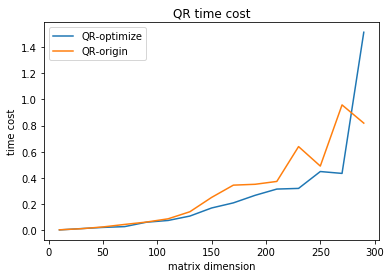

In [53]:
plt.plot(ranges,t1s,label='QR-optimize')
plt.plot(ranges,t2s,label='QR-origin')
# plt.plot(ranges,t3s,label='inner')
plt.legend()
plt.xlabel('matrix dimension')
plt.ylabel('time cost')
plt.title('QR time cost')
plt.show()

## QR algorithm

In [38]:
def QR_eig(A):
    for i in range(1000):
        Q,R=QR.__wrapped__(A)
        A=np.dot(np.dot(Q.transpose(),A),Q)
    return A
    

In [39]:
d=3
A=np.random.rand(d,d)*10

In [40]:
A

array([[5.25389445, 0.46076854, 8.35354771],
       [7.5429056 , 1.31992101, 4.55302963],
       [2.17974701, 0.57485023, 2.13390142]])

In [41]:
print(np.allclose(np.sort(np.linalg.eigvals(A)),np.sort(np.diag(QR_eig(A)))))

False


In [42]:
Q

array([[ 9.55825107e-03,  7.46144672e-02, -2.45067959e-02, ...,
        -4.17604334e-02, -6.32171441e-02,  3.06355553e-02],
       [ 7.00187878e-02,  4.59061407e-02,  8.31857061e-02, ...,
         1.43590557e-02,  3.30443802e-02,  2.09559610e-01],
       [ 7.88646660e-02,  6.38706403e-02, -7.37171622e-02, ...,
        -6.51849225e-02,  1.44533102e-01,  1.24754351e-01],
       ...,
       [ 1.66816163e-01, -1.71359406e-01, -3.23717776e-02, ...,
         5.55697499e-02, -5.72341119e-02,  8.19912666e-03],
       [ 1.18691448e-01,  4.56849255e-02,  1.53678633e-02, ...,
        -2.36755193e-02,  4.52963860e-02,  2.50829143e-01],
       [ 7.94385518e-05,  2.19026876e-01,  7.38762447e-02, ...,
         1.00585452e-01, -1.15863921e-01, -4.59110418e-02]])

In [43]:
Q.transpose()

array([[ 9.55825107e-03,  7.00187878e-02,  7.88646660e-02, ...,
         1.66816163e-01,  1.18691448e-01,  7.94385518e-05],
       [ 7.46144672e-02,  4.59061407e-02,  6.38706403e-02, ...,
        -1.71359406e-01,  4.56849255e-02,  2.19026876e-01],
       [-2.45067959e-02,  8.31857061e-02, -7.37171622e-02, ...,
        -3.23717776e-02,  1.53678633e-02,  7.38762447e-02],
       ...,
       [-4.17604334e-02,  1.43590557e-02, -6.51849225e-02, ...,
         5.55697499e-02, -2.36755193e-02,  1.00585452e-01],
       [-6.32171441e-02,  3.30443802e-02,  1.44533102e-01, ...,
        -5.72341119e-02,  4.52963860e-02, -1.15863921e-01],
       [ 3.06355553e-02,  2.09559610e-01,  1.24754351e-01, ...,
         8.19912666e-03,  2.50829143e-01, -4.59110418e-02]])